# Compression is intelligence
Trying to make inferences about the real world is hard because looking at a picture doesn't tell us how the movie ends. Similarly, knowing an image is predominantly made of red color, doesn't tell us what the image depics. This is the curse of dimensionality.




manifold hypothesis:



flatland(paper mario):



models that take points in high-dimensional spaces and translate them to lower-dimensions

$
\operatorname{Cov}(x, y) = \frac{\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}{n - 1}
$

In [ ]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

tensor_transform = transforms.ToTensor()
dataset = datasets.MNIST(root="./data", train=True, download=True, transform=tensor_transform)
loader = torch.utils.data.DataLoader(dataset=dataset, batch_size=32, shuffle=True)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9912422/9912422 [00:00<00:00, 11675720.52it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28881/28881 [00:00<00:00, 2123585.61it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1648877/1648877 [00:00<00:00, 10313451.83it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4542/4542 [00:00<00:00, 4681869.94it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



# AutoEncoder:
an autoencoder is a neural network that learns a dimensionality reduction transformation $ T(x) $ over a vector space $ X $ to a lower dimensional space $ Z $


$ T(x) $ is composed of two parts: 
- encoder $ e(x) : X \rightarrow Z $ 
- decoder $ d(z) : Z \rightarrow \hat{X} $ 

where $x \in X$ and $z \in Z$ respectively


\begin{aligned}
\text{Definition: Vector Space } V \text{ over a Field } \mathbb{F} \\
\text{A vector space } V \text{ is a set with two operations:} \\
\begin{itemize}
    \item \text{Vector Addition: } + : V \times V \to V \\
    \item \text{Scalar Multiplication: } \cdot : \mathbb{F} \times V \to V
\end{itemize}

\text{Satisfying the following axioms } \forall \vec{u}, \vec{v}, \vec{w} \in V \text{ and } a, b \in \mathbb{F}:

\begin{array}{l}
1. \text{Commutativity of Addition:} \quad \vec{u} + \vec{v} = \vec{v} + \vec{u} \\
2. \text{Associativity of Addition:} \quad (\vec{u} + \vec{v}) + \vec{w} = \vec{u} + (\vec{v} + \vec{w}) \\
3. \text{Zero Vector Existence:} \quad \exists \vec{0} \in V : \vec{u} + \vec{0} = \vec{u} \\
4. \text{Additive Inverse:} \quad \exists (-\vec{u}) : \vec{u} + (-\vec{u}) = \vec{0} \\
5. \text{Distributivity of Scalar Multiplication:} \quad a \cdot (\vec{u} + \vec{v}) = a \cdot \vec{u} + a \cdot \vec{v} \\
6. \text{Distributivity of Field Addition:} \quad (a + b) \cdot \vec{u} = a \cdot \vec{u} + b \cdot \vec{u} \\
7. \text{Associativity of Scalar Multiplication:} \quad a \cdot (b \cdot \vec{u}) = (ab) \cdot \vec{u} \\
8. \text{Identity of Scalar Multiplication:} \quad 1 \cdot \vec{u} = \vec{u}
\end{array}
\end{aligned}

In [2]:
class AE(nn.Module):
    def __init__(self):
        super(AE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 36),
            nn.ReLU(),
            nn.Linear(36, 18),
            nn.ReLU(),
            nn.Linear(18, 9)
        )
        self.decoder = nn.Sequential(
            nn.Linear(9, 18),
            nn.ReLU(),
            nn.Linear(18, 36),
            nn.ReLU(),
            nn.Linear(36, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
    
model = AE()
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-8)

Epoch 1/20, Loss: 0.042444
Epoch 2/20, Loss: 0.032672
Epoch 3/20, Loss: 0.032162
Epoch 4/20, Loss: 0.029104
Epoch 5/20, Loss: 0.025454
Epoch 6/20, Loss: 0.023862
Epoch 7/20, Loss: 0.020262
Epoch 8/20, Loss: 0.022550
Epoch 9/20, Loss: 0.023271
Epoch 10/20, Loss: 0.022467
Epoch 11/20, Loss: 0.024080
Epoch 12/20, Loss: 0.021659
Epoch 13/20, Loss: 0.021312
Epoch 14/20, Loss: 0.023546
Epoch 15/20, Loss: 0.023810
Epoch 16/20, Loss: 0.021005
Epoch 17/20, Loss: 0.020114
Epoch 18/20, Loss: 0.022866
Epoch 19/20, Loss: 0.020188
Epoch 20/20, Loss: 0.017184


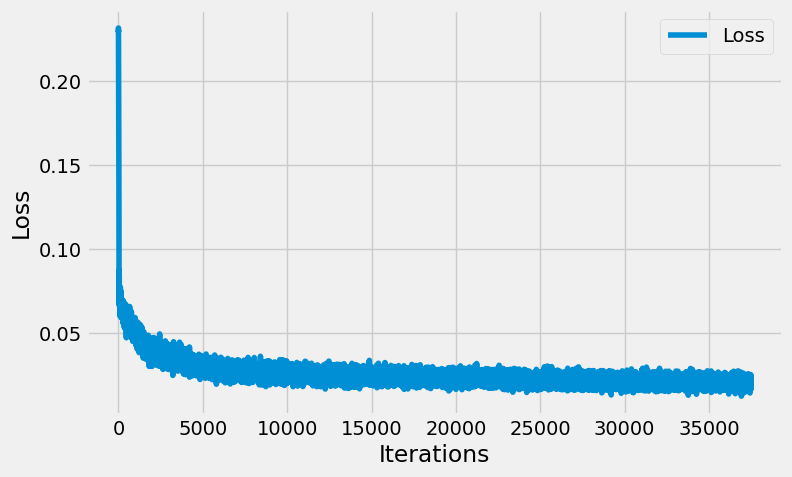

In [3]:
epochs = 20
outputs = []
losses = []

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(epochs):
    for images, _ in loader:
        images = images.view(-1, 28 * 28).to(device)
        
        reconstructed = model(images)
        loss = loss_function(reconstructed, images)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        losses.append(loss.item())
    
    outputs.append((epoch, images, reconstructed))
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.6f}")

plt.style.use('fivethirtyeight')
plt.figure(figsize=(8, 5))
plt.plot(losses, label='Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [1]:
for i, (x, y) in enumerate(loader):
    z = model.encoder(x.to(device))
    z = z.to('cpu').detach().numpy()
    plt.scatter(z[:, 0], z[:, 1], c=y, cmap='tab10')
    if i > 32:
        plt.colorbar()
        break

NameError: name 'loader' is not defined

In [5]:
def plot_reconstructed(autoencoder, r0=(-5, 10), r1=(-10, 5), n=12):
    w = 28
    img = np.zeros((n*w, n*w))
    for i, y in enumerate(np.linspace(*r1, n)):
        for j, x in enumerate(np.linspace(*r0, n)):
            z = torch.Tensor([[x, y]]).to(device)
            x_hat = autoencoder.decoder(z)
            x_hat = x_hat.reshape(28, 28).to('cpu').detach().numpy()
            img[(n-1-i)*w:(n-1-i+1)*w, j*w:(j+1)*w] = x_hat
    plt.imshow(img, extent=[*r0, *r1])

plot_reconstructed(model) 

NameError: name 'np' is not defined

BUT if I tried to pass any other different image (outlier or anomaly), we will get a high reconstruction loss value because the network failed to reconstruct the image/input that is considered an anomaly.


You may have noticed that there are “gaps” in the latent space, where data is never mapped to. This becomes a problem when we try to use autoencoders as generative models.
gradients cannot flow through sampling (which is a non-differentiable operation). 


# Deep Latent Variable Models
we are interested in learning the latent distribution conditioned only on our data: p(z|x)

$p(z|x) = \frac{p(x|z)p(z)}{p(x)}$ - bayes rule:

the problem is that 


$ p_θ(x) = \int p_θ(x, z)d\theta $

this is called the model evidence
How likely are the observed data, considering all possible parameter configurations?


$p(x)$ is intractable




$ p_θ(x)  = z $





decoder = p(x|z)p(z)



inference model:
$ q_θ(z|x)  \approx  p_\theta(z|x) $


## Evidence Lower Bound:


$ log p(x) = \mathbb{E}[\log p_\theta(x)]$

$ log p(x) = \mathbb{E}[log[\frac{p_\theta(x, z)}{p(z|x)}]]$


$ log p(x) = \mathbb{E}[\frac{logp_\theta(x) p_\theta(x, z)   q_\phi(x, z) }{p(z|x) q_\phi(x, z) }]$

$ L_{\theta, \phi}(x) =\mathbb{E}[log [p_\theta(x,z)] - log q_\phi(z|x)] $

$ L_{\theta, \phi}(x) \le  \log p_θ(x)$

$D_\mathbb{KL}\left( \mathcal{N}(\mu, \sigma) \parallel \mathcal{N}(0, 1) \right) = \sum_{x \in X} \left( \sigma^2 + \mu^2 - \log \sigma - \frac{1}{2} \right)\ $





## Evidence Lower Bound (ELBO) Derivation

The equations represent a key derivation in variational inference, specifically the Evidence Lower BOund (ELBO) for a probabilistic model:

1. Starting Point:
   $\log p(x) = \mathbb{E}[\log p_\theta(x)]$

2. Introducing Latent Variable $z$:
   $\log p(x) = \mathbb{E}[\log\left(\frac{p_\theta(x, z)}{p(z|x)}\right)]$

3. Rearranging Terms:
   $\log p(x) = \mathbb{E}\left[\frac{\log p_\theta(x) p_\theta(x, z) q_\phi(x, z)}{p(z|x) q_\phi(x, z)}\right]$

4. Evidence Lower Bound (ELBO):
   $L_{\theta, \phi}(x) = \mathbb{E}[\log p_\theta(x,z) - \log q_\phi(z|x)]$

5. ELBO Inequality:
   $L_{\theta, \phi}(x) \leq \log p_\theta(x)$

6. Kullback-Leibler Divergence for Normal Distributions:
   $D_\mathbb{KL}\left( \mathcal{N}(\mu, \sigma) \parallel \mathcal{N}(0, 1) \right) = \sum_{x \in X} \left( \sigma^2 + \mu^2 - \log \sigma - \frac{1}{2} \right)$

### Key Notation
- $p_\theta(x)$: Probabilistic model with parameters $\theta$
- $q_\phi(z|x)$: Variational approximation with parameters $\phi$




$ pθ(z|x) = \frac{pθ(x, z)}{pθ(x)}$

$ p_θ(x, z) = p_θ(z)p_θ(x|z) $

$p(z)$ is the prior distribution over Z




# Variational AutoEncoder:
Instead of mapping an input to a fixed-point representation, VAEs learn to map inputs to a probability distribution in the latent space. Specifically, the encoder network produces two key parameters:

- A mean vector (μ)
- A variance vector (σ²)

These parameters define a multivariate Gaussian distribution from which latent representations are sampled during training and inference.




z = μ + σ ⊙ ε
Where:

z is the sampled latent representation
μ is the mean vector
σ is the standard deviation vector
ε is a sample from a standard normal distribution
⊙ represents element-wise multiplication








#### 2.1.1 Fundamental Objective
The core challenge in generative modeling is to learn a probability distribution $p_\theta(x)$ that accurately represents the underlying data. Mathematically, we seek to maximize the log-likelihood:

$\log p(x) = \mathbb{E}[\log p_\theta(x)]$

#### 2.1.2 Introducing Latent Variables
To capture complex data structures, we introduce a latent variable $z$, transforming our objective:

$\log p(x) = \mathbb{E}\left[\log\left(\frac{p_\theta(x, z)}{p(z|x)}\right)\right]$

### 2.2 Evidence Lower Bound (ELBO)

#### 2.2.1 Derivation
The key insight of VAEs is the Evidence Lower Bound (ELBO), which provides a tractable optimization objective:

$L_{\theta, \phi}(x) = \mathbb{E}[\log p_\theta(x,z) - \log q_\phi(z|x)]$

#### 2.2.2 Fundamental Inequality
A critical property of the ELBO is its relationship to the marginal log-likelihood:

$L_{\theta, \phi}(x) \leq \log p_\theta(x)$

### 2.3 Probabilistic Interpretation

#### 2.3.1 Kullback-Leibler Divergence
The ELBO incorporates the Kullback-Leibler (KL) divergence, which measures the difference between two probability distributions. For Gaussian distributions, this is particularly elegant:

$D_\mathbb{KL}\left( \mathcal{N}(\mu, \sigma) \parallel \mathcal{N}(0, 1) \right) = \sum_{x \in X} \left( \sigma^2 + \mu^2 - \log \sigma - \frac{1}{2} \right)$

## Chapter 3: Practical Implementation

### 3.1 Key Components
1. **Encoder Network**: Learns $q_\phi(z|x)$ - the approximate posterior distribution
2. **Decoder Network**: Learns $p_\theta(x|z)$ - the generative distribution
3. **Reparameterization Trick**: Enables gradient-based learning of stochastic encoders

## Chapter 4: Intuitive Understanding

### 4.1 Conceptual Breakdown
VAEs can be understood as a sophisticated compression technique that:
- Learns a compressed representation of data
- Enables generation of new, similar data points
- Provides a probabilistic interpretation of data manifolds

## Conclusion
Variational Autoencoders represent a powerful synthesis of probabilistic modeling and deep learning, offering a principled approach to understanding and generating complex data distributions.

### Recommended Further Reading
- Kingma, D. P., & Welling, M. (2013). Auto-Encoding Variational Bayes
- Rezende, D. J., Mohamed, S., & Wierstra, D. (2014). Stochastic Backpropagation and Approximate Inference in Deep Generative Models
